# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import sklearn.metrics as sklm

%matplotlib inline

### Getting my data

In [2]:
train_values = pd.read_csv('train_values.csv', index_col='row_id')
train_labels = pd.read_csv('train_labels.csv', index_col='row_id')
test_values = pd.read_csv('test_values.csv', index_col='row_id')
submit_format = pd.read_csv('submission_format.csv')

# Analysis/Modeling

## Analyse training data

#### Get the shape of the training data

In [3]:
print(train_values.shape)
print(train_labels.shape)

(500000, 21)
(500000, 1)


In [4]:
train_values.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
row_id,,,,,,,,,,,,,,,,,,,,,
0,3,1,1,1,70.0,3,18,37,246,2,...,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False
1,1,1,3,1,178.0,3,369,52,299,1,...,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False
2,2,1,3,1,163.0,3,16,10,306,2,...,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False
3,1,1,1,1,155.0,1,305,47,180,2,...,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True
4,1,1,1,1,305.0,3,24,37,20,2,...,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False


In [5]:
train_labels.head()

,accepted
row_id,
0,1
1,0
2,1
3,1
4,1


In [6]:
# profile = pp.ProfileReport(train_values)

In [7]:
# profile.to_file(outputfile="hdma.html")

In [8]:
train_values.dtypes

loan_type                           int64
property_type                       int64
loan_purpose                        int64
occupancy                           int64
loan_amount                       float64
preapproval                         int64
msa_md                              int64
state_code                          int64
county_code                         int64
applicant_ethnicity                 int64
applicant_race                      int64
applicant_sex                       int64
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                              int64
co_applicant                         bool
dtype: object

In [9]:
# columns = list(train_values.columns)
# for column in columns:
#     if train_values[column].dtypes == 'int':
#         train_values[column] = train_values[column].astype('str')

In [10]:
# train_values.dtypes

In [11]:
# train_values=train_values.replace(-1,'')

In [12]:
# train_values

#### Check for missing data in the training value and labels

In [13]:
train_values.dtypes

loan_type                           int64
property_type                       int64
loan_purpose                        int64
occupancy                           int64
loan_amount                       float64
preapproval                         int64
msa_md                              int64
state_code                          int64
county_code                         int64
applicant_ethnicity                 int64
applicant_race                      int64
applicant_sex                       int64
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                              int64
co_applicant                         bool
dtype: object

In [14]:
train_values.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_type,500000.0,1.366276,0.690555,1.000,1.00000,1.000,2.00,4.0
property_type,500000.0,1.047650,0.231404,1.000,1.00000,1.000,1.00,3.0
loan_purpose,500000.0,2.066810,0.948371,1.000,1.00000,2.000,3.00,3.0
occupancy,500000.0,1.109590,0.326092,1.000,1.00000,1.000,1.00,3.0
loan_amount,500000.0,221.753158,590.641648,1.000,93.00000,162.000,266.00,100878.0
preapproval,500000.0,2.764722,0.543061,1.000,3.00000,3.000,3.00,3.0
msa_md,500000.0,181.606972,138.464169,-1.000,25.00000,192.000,314.00,408.0
state_code,500000.0,23.726924,15.982768,-1.000,6.00000,26.000,37.00,52.0
county_code,500000.0,144.542062,100.243612,-1.000,57.00000,131.000,246.00,324.0
applicant_ethnicity,500000.0,2.036228,0.511351,1.000,2.00000,2.000,2.00,4.0


In [15]:
le = preprocessing.LabelEncoder()
le.fit(train_values['co_applicant'])
# print(le.classes_)
transformed_co_applicant = le.transform(train_values['co_applicant'])
train_values['co_applicant'] = transformed_co_applicant
train_values.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
row_id,,,,,,,,,,,,,,,,,,,,,
0,3,1,1,1,70.0,3,18,37,246,2,...,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,0
1,1,1,3,1,178.0,3,369,52,299,1,...,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,0
2,2,1,3,1,163.0,3,16,10,306,2,...,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,0
3,1,1,1,1,155.0,1,305,47,180,2,...,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,1
4,1,1,1,1,305.0,3,24,37,20,2,...,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,0


In [16]:
train_data = pd.merge(train_labels, train_values, on='row_id')
# train_data = pd.merge?

In [17]:
train_data.shape

(500000, 22)

In [18]:
train_data.head()

,accepted,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
row_id,,,,,,,,,,,,,,,,,,,,,
0,1,3,1,1,1,70.0,3,18,37,246,...,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,0
1,0,1,1,3,1,178.0,3,369,52,299,...,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,0
2,1,2,1,3,1,163.0,3,16,10,306,...,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,0
3,1,1,1,1,1,155.0,1,305,47,180,...,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,1
4,1,1,1,1,1,305.0,3,24,37,20,...,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,0


In [19]:
# Create a variable for int column and float column
int_column = []
float_column = []

for column in train_data.columns:
    if(train_data[column].dtypes == 'int'):
        int_column.append(column)
    else:
        float_column.append(column)
        
print(int_column)
print(float_column)

['accepted', 'loan_type', 'property_type', 'loan_purpose', 'occupancy', 'preapproval', 'msa_md', 'state_code', 'county_code', 'applicant_ethnicity', 'applicant_race', 'applicant_sex', 'lender', 'co_applicant']
['loan_amount', 'applicant_income', 'population', 'minority_population_pct', 'ffiecmedian_family_income', 'tract_to_msa_md_income_pct', 'number_of_owner-occupied_units', 'number_of_1_to_4_family_units']


In [20]:
train_data[int_column].nunique()

accepted                  2
loan_type                 4
property_type             3
loan_purpose              3
occupancy                 3
preapproval               3
msa_md                  409
state_code               53
county_code             318
applicant_ethnicity       4
applicant_race            7
applicant_sex             4
lender                 6111
co_applicant              2
dtype: int64

In [21]:
# sns.pairplot(train_data[float_column])

In [22]:
# train_data[float_column].corr()

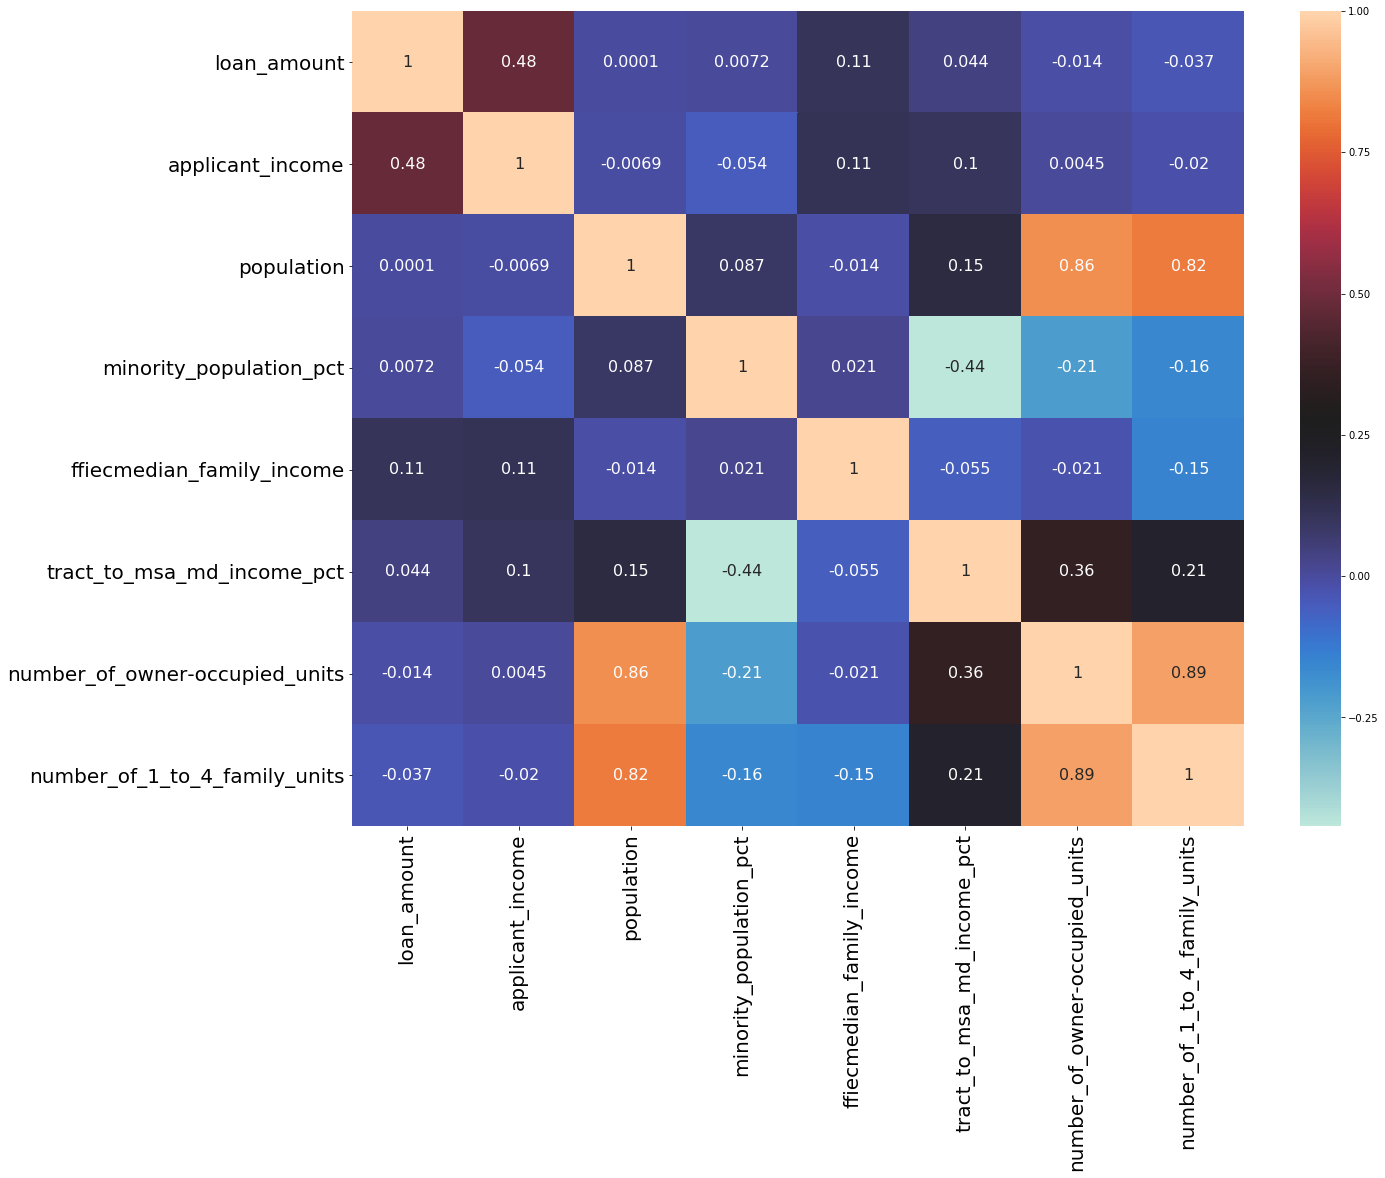

In [23]:
cor = train_data[float_column].corr()
heatmap = sns.heatmap(cor,xticklabels=cor.columns.values,yticklabels=cor.columns.values,annot=True,annot_kws={'size':16},cmap='icefire')
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.savefig('correlation_plot.png')
plt.show()

In [24]:
# train_data[float_column].corr()

In [25]:
for col in int_column:
    # get the number of -1 in column
    count = train_data[train_data[col]==-1][col].count()
    if(count>0):
        print('{}: {} missing value'.format(col,count))

msa_md: 76982 missing value
state_code: 19132 missing value
county_code: 20466 missing value


In [26]:
for col in float_column:
    # get the number of -1 in column
    count = train_data[col].isna().sum()
#     if(count>0):
    print('{}: {} missing value'.format(col,count))

loan_amount: 0 missing value
applicant_income: 39948 missing value
population: 22465 missing value
minority_population_pct: 22466 missing value
ffiecmedian_family_income: 22440 missing value
tract_to_msa_md_income_pct: 22514 missing value
number_of_owner-occupied_units: 22565 missing value
number_of_1_to_4_family_units: 22530 missing value


In [27]:
train_data[train_data['loan_amount']<1000]['loan_amount'].count()

494411

In [28]:
int_column.remove('accepted')

In [29]:
print(int_column)
print(float_column)

['loan_type', 'property_type', 'loan_purpose', 'occupancy', 'preapproval', 'msa_md', 'state_code', 'county_code', 'applicant_ethnicity', 'applicant_race', 'applicant_sex', 'lender', 'co_applicant']
['loan_amount', 'applicant_income', 'population', 'minority_population_pct', 'ffiecmedian_family_income', 'tract_to_msa_md_income_pct', 'number_of_owner-occupied_units', 'number_of_1_to_4_family_units']


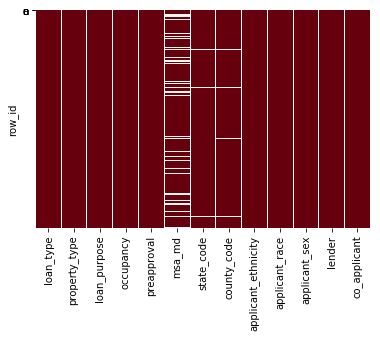

In [30]:
# missing = train_values[float_column]
# sns.heatmap(missing.isnull(), cbar=False, yticklabels='none', cmap='Reds_r')

missing = train_values[int_column]
missing = missing==-1 
sns.heatmap(missing, cbar=False, yticklabels='none', cmap='Reds_r')
# # train_values.isnull()
# sns.heatmap?

In [31]:
train_data[train_values['state_code']==-1]

,accepted,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
row_id,,,,,,,,,,,,,,,,,,,,,
26,0,1,1,1,1,113.0,1,-1,-1,-1,...,2,54.0,NaN,NaN,NaN,NaN,NaN,NaN,2839,0
38,0,1,1,1,2,88.0,1,-1,-1,-1,...,2,104.0,NaN,NaN,NaN,NaN,NaN,NaN,788,1
79,0,2,1,1,1,296.0,1,-1,-1,-1,...,2,42.0,NaN,NaN,NaN,NaN,NaN,NaN,3060,0
90,0,2,1,1,1,64.0,1,-1,-1,-1,...,1,42.0,NaN,NaN,NaN,NaN,NaN,NaN,5415,1
99,0,1,1,1,1,139.0,1,-1,-1,-1,...,3,96.0,NaN,NaN,NaN,NaN,NaN,NaN,6349,0
120,0,1,2,1,1,410.0,3,-1,-1,-1,...,1,78.0,NaN,NaN,NaN,NaN,NaN,NaN,4390,0
123,0,1,1,1,1,40.0,1,-1,-1,-1,...,1,122.0,NaN,NaN,NaN,NaN,NaN,NaN,4701,1
129,0,1,1,1,1,136.0,1,-1,-1,-1,...,2,49.0,NaN,NaN,NaN,NaN,NaN,NaN,1495,0
158,0,1,1,1,1,168.0,1,-1,-1,-1,...,1,39.0,NaN,NaN,NaN,NaN,NaN,NaN,4701,0


In [32]:
train_values.iloc[26]

loan_type                            1.0
property_type                        1.0
loan_purpose                         1.0
occupancy                            1.0
loan_amount                        113.0
preapproval                          1.0
msa_md                              -1.0
state_code                          -1.0
county_code                         -1.0
applicant_ethnicity                  2.0
applicant_race                       5.0
applicant_sex                        2.0
applicant_income                    54.0
population                           NaN
minority_population_pct              NaN
ffiecmedian_family_income            NaN
tract_to_msa_md_income_pct           NaN
number_of_owner-occupied_units       NaN
number_of_1_to_4_family_units        NaN
lender                            2839.0
co_applicant                         0.0
Name: 26, dtype: float64

In [33]:
train_data_median = train_data.copy(deep=True)
for col in float_column:
    train_data_median[col].fillna(train_data_median[col].median(),inplace=True)

In [34]:
train_values_without_state_code_missing_value = train_data_median[train_data_median['state_code']!=-1]

In [35]:
for col in int_column:
    # get the number of -1 in column
    count = train_values_without_state_code_missing_value[train_values_without_state_code_missing_value[col]==-1][col].count()
    if(count>0):
        print('{}: {} missing value'.format(col,count))

msa_md: 57850 missing value
county_code: 1334 missing value


In [37]:
for col in float_column:
    # get the number of -1 in column
    count = train_values_without_state_code_missing_value[col].isna().sum()
#     if(count>0):
    print('{}: {} missing value'.format(col,count))

loan_amount: 0 missing value
applicant_income: 0 missing value
population: 0 missing value
minority_population_pct: 0 missing value
ffiecmedian_family_income: 0 missing value
tract_to_msa_md_income_pct: 0 missing value
number_of_owner-occupied_units: 0 missing value
number_of_1_to_4_family_units: 0 missing value


In [ ]:
train_values_without_state_code_missing_value.shape

In [ ]:
train_values_without_state_code_missing_value[train_values_without_state_code_missing_value.duplicated()]

In [38]:
# Splitting my cleaned  train data into train and validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost
import time
from catboost import CatBoostClassifier, Pool

In [39]:
dropcols = ['accepted']#,'number_of_owner-occupied_units','number_of_1_to_4_family_units']
#dropcols = ['accepted','population','minority_population_pct','ffiecmedian_family_income',
#'tract_to_msa_md_income_pct','number_of_owner-occupied_units','number_of_1_to_4_family_units','lender']
y = train_data_median['accepted']
X = train_data_median.drop(columns= dropcols,axis=1)
print(X.shape)
print(y.shape)

(500000, 21)
(500000,)


In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15,random_state=1)
print(X_train.shape)
print(y_train.shape)
print('+-'*7)
print(X_test.shape)
print(y_test.shape)

(425000, 21)
(425000,)
+-+-+-+-+-+-+-
(75000, 21)
(75000,)


In [42]:
X.columns

Index(['loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant'],
      dtype='object')

In [41]:
columns_to_scale = X.columns.tolist()

### Logistical regression for median without missing state code

In [43]:
logit = LogisticRegression()
before = time.time()
logitmodel = logit.fit(X_train,y_train)
logpred = logitmodel.predict(X_test)
print("The accuracy score for the logistic regression is %.2f" % (accuracy_score(logpred,y_test)*100))
after = time.time()
print("Time taken to execute algorithm is : {:5.2f} s".format(after - before))
print('+-'*50)

/home/igori/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy score for the logistic regression is 62.19
Time taken to execute algorithm is : 29.65 s
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


The accuracy score for the decision tree classifier is 65.98
Time taken to execute algorithm is :  2.49 s
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-



Text(0, 0.5, 'Normalized Gini Importance')

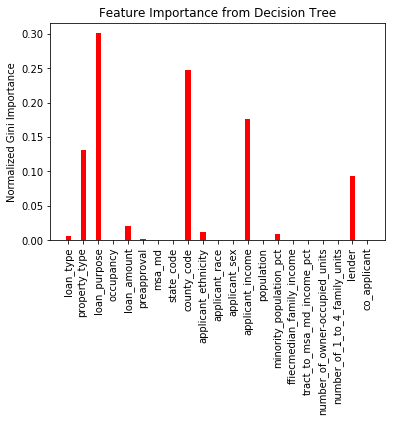

In [44]:
dtc = DecisionTreeClassifier(max_depth=5) 
before = time.time()
dtcmodel = dtc.fit(X_train,y_train)
dtcpred = dtcmodel.predict(X_test)
print("The accuracy score for the decision tree classifier is %.2f" % (accuracy_score(dtcpred,y_test)*100))
after = time.time()
print("Time taken to execute algorithm is : {:5.2f} s".format(after - before))
# print('The accuracy score for logistic regression is {}'.format(accuracy_score(y_val,ypred)*100))
print('+-'*50)
print('')
# plotting feature importance
fig, ax = plt.subplots()
width=0.35
ax.bar(np.arange(len(columns_to_scale)), dtcmodel.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(dtcmodel.feature_importances_)))
ax.set_xticklabels(X_train.columns.values,rotation=90)
plt.title('Feature Importance from Decision Tree')
ax.set_ylabel('Normalized Gini Importance')

## Without 'msa_md', 'state_code', 'county_code','applicant_ethnicity', 'applicant_race', 'applicant_sex'

In [ ]:
train_values_without_state_code_missing_value.shape

In [ ]:
train_data_median.shape

In [ ]:
for col in int_column:
    # get the number of -1 in column
    count = train_values_without_state_code_missing_value[train_values_without_state_code_missing_value[col]==-1][col].count()
    if(count>0):
        print('{}: {} missing value'.format(col,count))
for col in float_column:
    # get the number of -1 in column
    count = train_values_without_state_code_missing_value[col].isna().sum()
    if(count>0):
        print('{}: {} missing value'.format(col,count))

In [ ]:
for col in int_column:
    # get the number of -1 in column
    count = train_data_median[train_data_median[col]==-1][col].count()
    if(count>0):
        print('{}: {} missing value'.format(col,count))
for col in float_column:
    # get the number of -1 in column
    count = train_data_median[col].isna().sum()
    if(count>0):
        print('{}: {} missing value'.format(col,count))

### Without outlier

In [ ]:
# dropcols = ['accepted','msa_md', 'state_code', 'county_code','applicant_ethnicity', 'applicant_race', 'applicant_sex']
dropcols = ['accepted','applicant_ethnicity', 'applicant_race', 'applicant_sex']
X = train_values_without_state_code_missing_value.drop(columns= dropcols,axis=1)
y = train_values_without_state_code_missing_value['accepted']
print(X.shape)
print(y.shape)

### With outlier and duplicate

In [ ]:
dropcols = ['accepted','msa_md', 'state_code', 'county_code','applicant_ethnicity', 'applicant_race', 'applicant_sex']
X = train_data_median.drop(columns= dropcols,axis=1)
y = train_data_median['accepted']
print(X.shape)
print(y.shape)

### With outlier without duplicate

In [ ]:
train_data_median_wd = train_data_median.drop_duplicates()
train_data_median_wd.duplicated().sum()

In [ ]:
dropcols = ['accepted', 'applicant_ethnicity', 'applicant_race', 'applicant_sex']
X = train_data_median_wd.drop(columns= dropcols,axis=1)
y = train_data_median_wd['accepted']
print(X.shape)
print(y.shape)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15,random_state=1)
print(X_train.shape)
print(y_train.shape)
print('+-'*7)
print(X_test.shape)
print(y_test.shape)

In [ ]:
columns_to_scale = X.columns.tolist()

In [ ]:
logit = LogisticRegression()
before = time.time()
logitmodel = logit.fit(X_train,y_train)
logpred = logitmodel.predict(X_test)
print("The accuracy score for the logistic regression is %.2f" % (accuracy_score(logpred,y_test)*100))
after = time.time()
print("Time taken to execute algorithm is : {:5.2f} s".format(after - before))
print('+-'*50)

In [ ]:
dtc = DecisionTreeClassifier(max_depth=5) 
before = time.time()
dtcmodel = dtc.fit(X_train,y_train)
dtcpred = dtcmodel.predict(X_test)
print("The accuracy score for the decision tree classifier is %.2f" % (accuracy_score(dtcpred,y_test)*100))
after = time.time()
print("Time taken to execute algorithm is : {:5.2f} s".format(after - before))
# print('The accuracy score for logistic regression is {}'.format(accuracy_score(y_val,ypred)*100))
print('+-'*50)
print('')
# plotting feature importance
fig, ax = plt.subplots()
width=0.35
ax.bar(np.arange(len(columns_to_scale)), dtcmodel.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(dtcmodel.feature_importances_)))
ax.set_xticklabels(X_train.columns.values,rotation=90)
plt.title('Feature Importance from Decision Tree')
ax.set_ylabel('Normalized Gini Importance')

In [ ]:
rand = RandomForestClassifier(bootstrap=True,criterion = "entropy",
                              n_jobs=-1,
                              max_depth=25,
                              n_estimators=700,
                              random_state=0,
                              class_weight="balanced",
                              max_features=0.5,
                              verbose=100)
randmodel = rand.fit(X_train,y_train)
randpred = randmodel.predict(X_test)
# rfPredictproba = randomForest.predict_proba(X_test)[:,1] #for ROC curve
rfAccuracy = accuracy_score(y_test,randpred)
roc_score = roc_auc_score(y_test,randpred)
# print(rfAccuracy)
print("The accuracy score for the random forest classifier is %.2f with an roc_score of %.2f" % (rfAccuracy*100,roc_score))
after = time.time()
print("Time taken to execute algorithm is : {:5.2f} s".format(after - before))
print('+-'*50)
print('')

# plotting feature importance
fig, ax = plt.subplots()
width=0.35
ax.bar(np.arange(len(columns_to_scale)), randmodel.feature_importances_, width, color='b')
ax.set_xticks(np.arange(len(randmodel.feature_importances_)))
ax.set_xticklabels(X_train.columns.values,rotation=90)
plt.title('Feature Importance from Random Forest')
ax.set_ylabel('Normalized Gini Importance')

# Start here

In [ ]:
dropcols = ['accepted','applicant_ethnicity', 'applicant_race', 'applicant_sex', 'number_of_1_to_4_family_units', 'population']
X = train_data_median.drop(columns= dropcols,axis=1)
y = train_data_median['accepted']
print(X.shape)
print(y.shape)

In [45]:
dropcols = ['accepted','applicant_ethnicity', 'applicant_race', 'applicant_sex']
X = train_data_median.drop(columns= dropcols,axis=1)
y = train_data_median['accepted']
print(X.shape)
print(y.shape)

(500000, 18)
(500000,)


<Figure size 432x288 with 0 Axes>

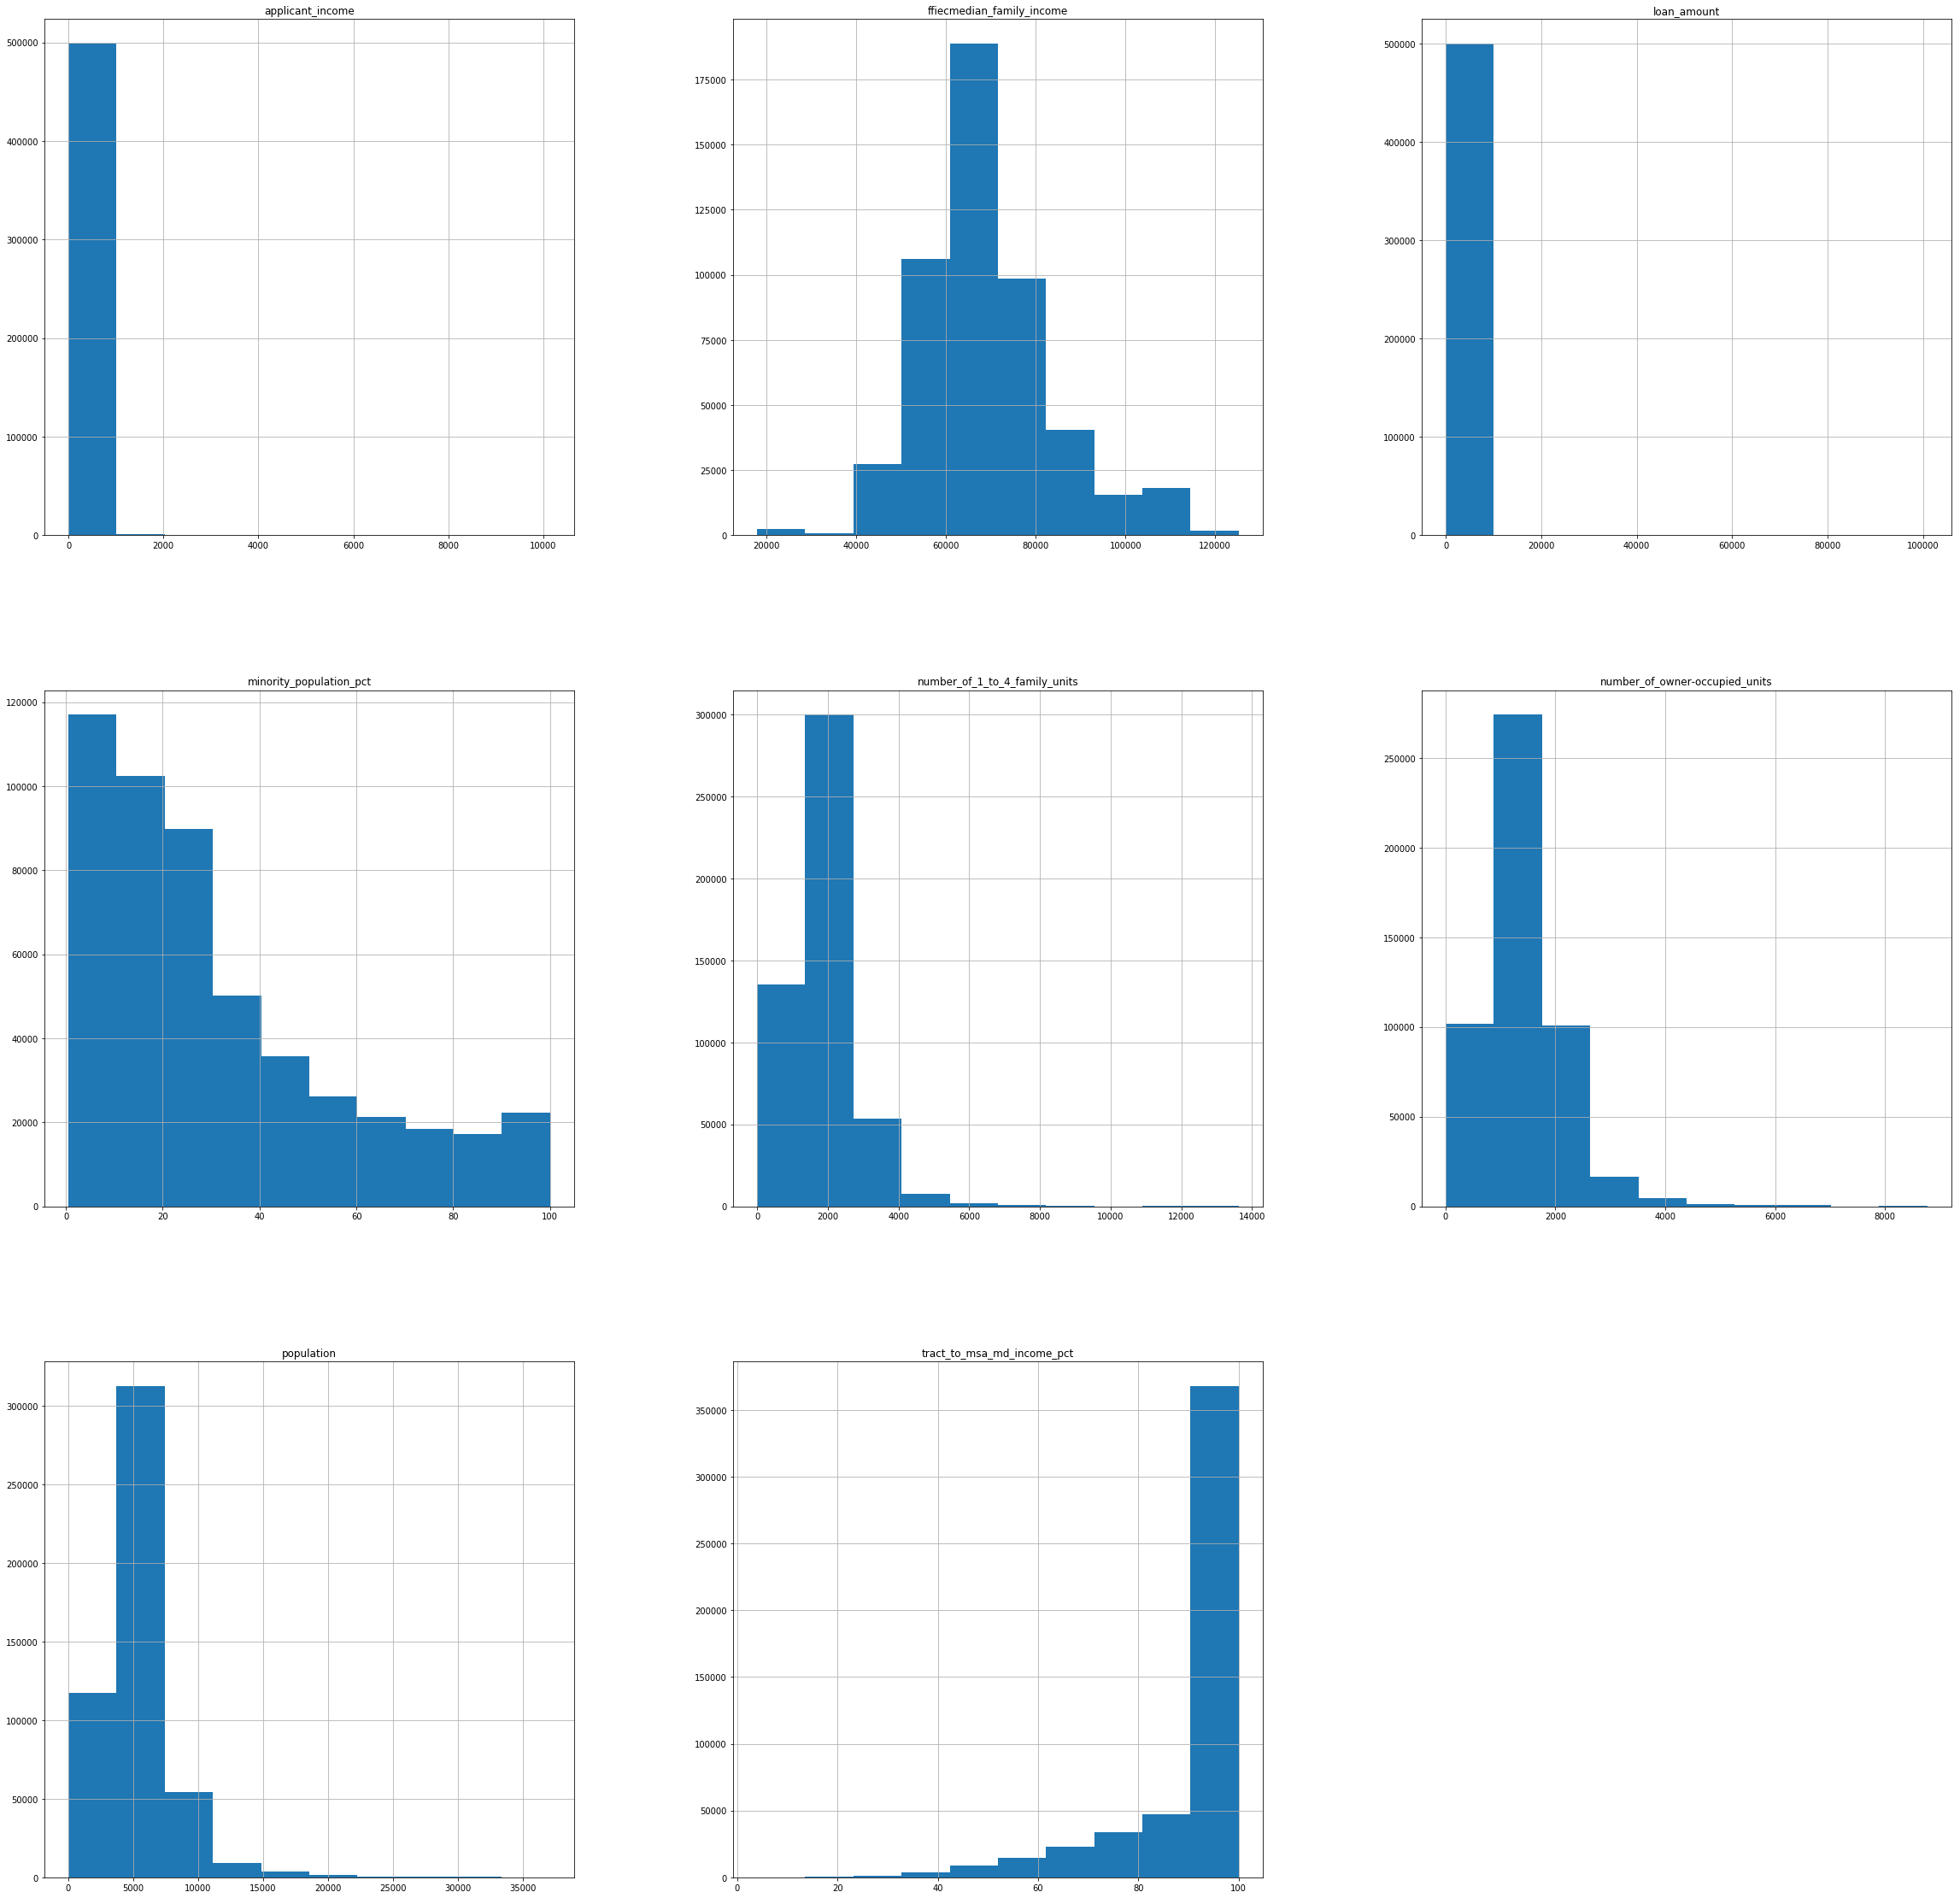

In [46]:
histo=plt.figure()
histo=X[float_column].hist(figsize=(40,40))
plt.show()

## Best algorithm is with state_code, with location and with duplicate

In [47]:
train_data_median.head()

,accepted,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
row_id,,,,,,,,,,,,,,,,,,,,,
0,1,3,1,1,1,70.0,3,18,37,246,...,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,0
1,0,1,1,3,1,178.0,3,369,52,299,...,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,0
2,1,2,1,3,1,163.0,3,16,10,306,...,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,0
3,1,1,1,1,1,155.0,1,305,47,180,...,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,1
4,1,1,1,1,1,305.0,3,24,37,20,...,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,0


In [ ]:
train_data_median.duplicated().sum()

In [ ]:
histo=plt.figure()
histo=np.power(train_data_median['number_of_1_to_4_family_units'],1/3).hist()
# histo=np.power(train_data_median['applicant_income'], 1/3).hist()
plt.show()

In [50]:
float_log = ['applicant_income','loan_amount','tract_to_msa_md_income_pct']
float_cube_root = ['minority_population_pct','number_of_1_to_4_family_units','number_of_owner-occupied_units','population']

<Figure size 432x288 with 0 Axes>

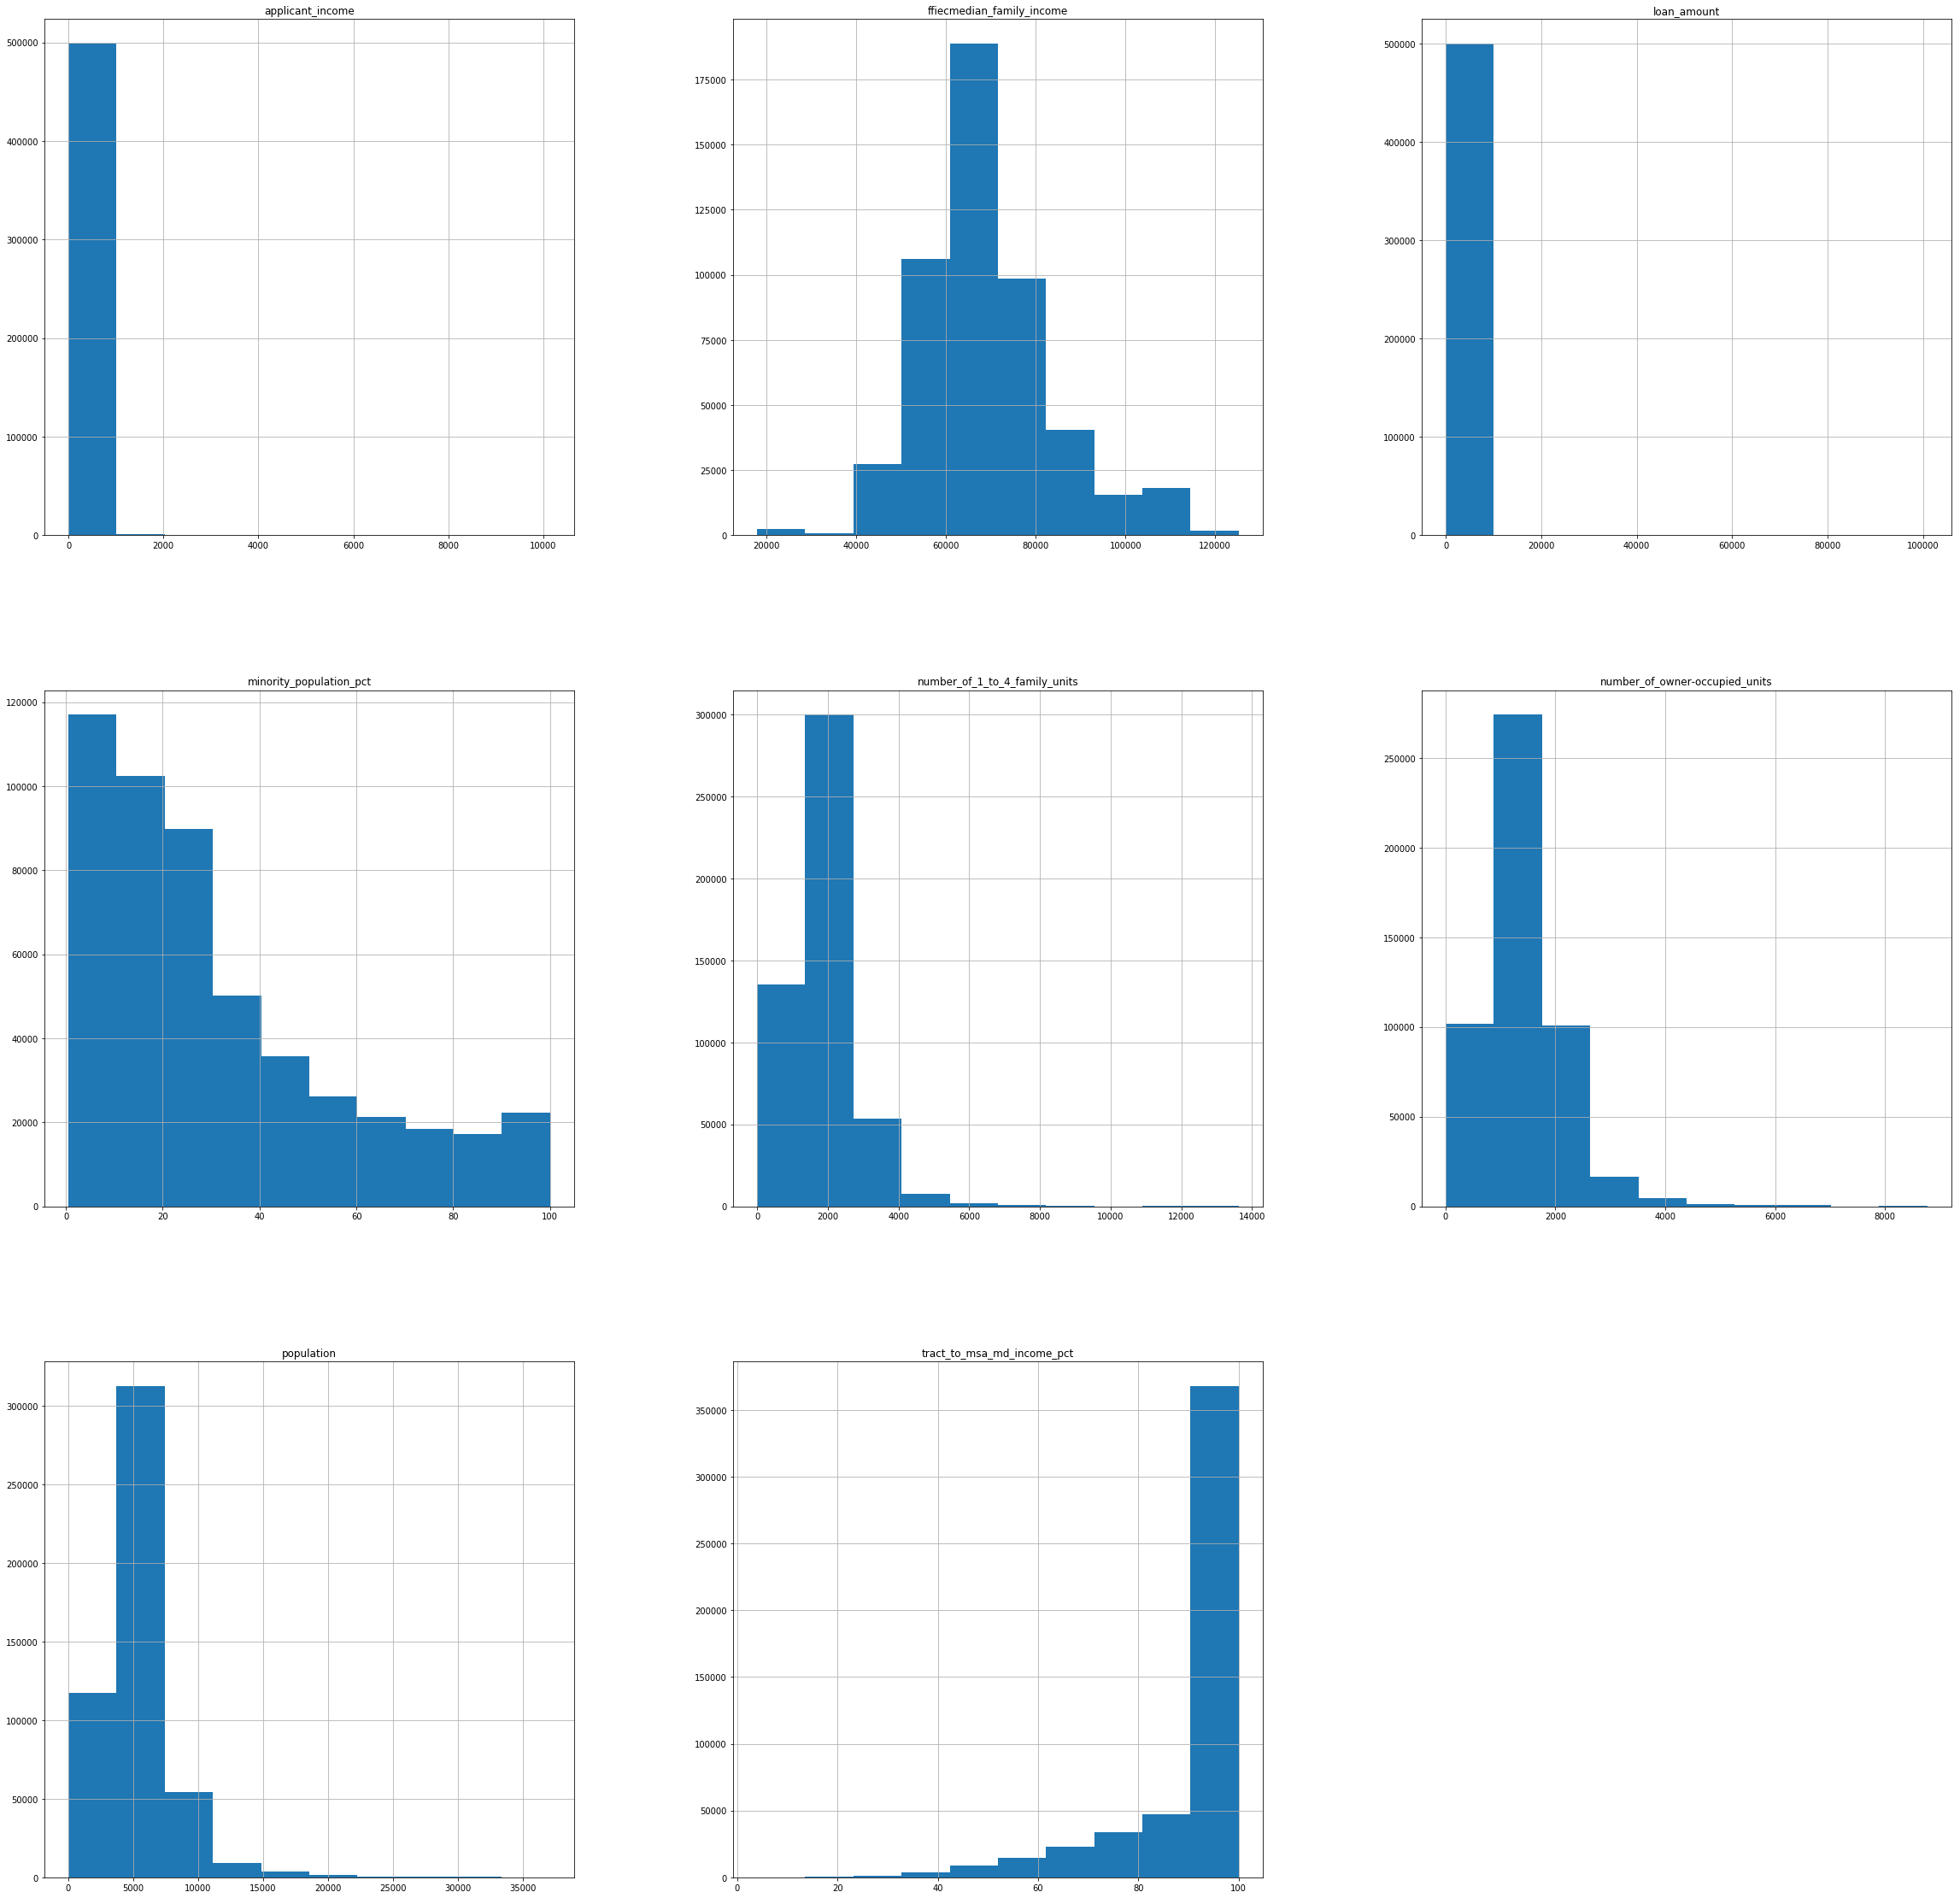

In [48]:
histo=plt.figure()
histo=train_data_median[float_column].hist(figsize=(40,40))
plt.show()

<Figure size 432x288 with 0 Axes>

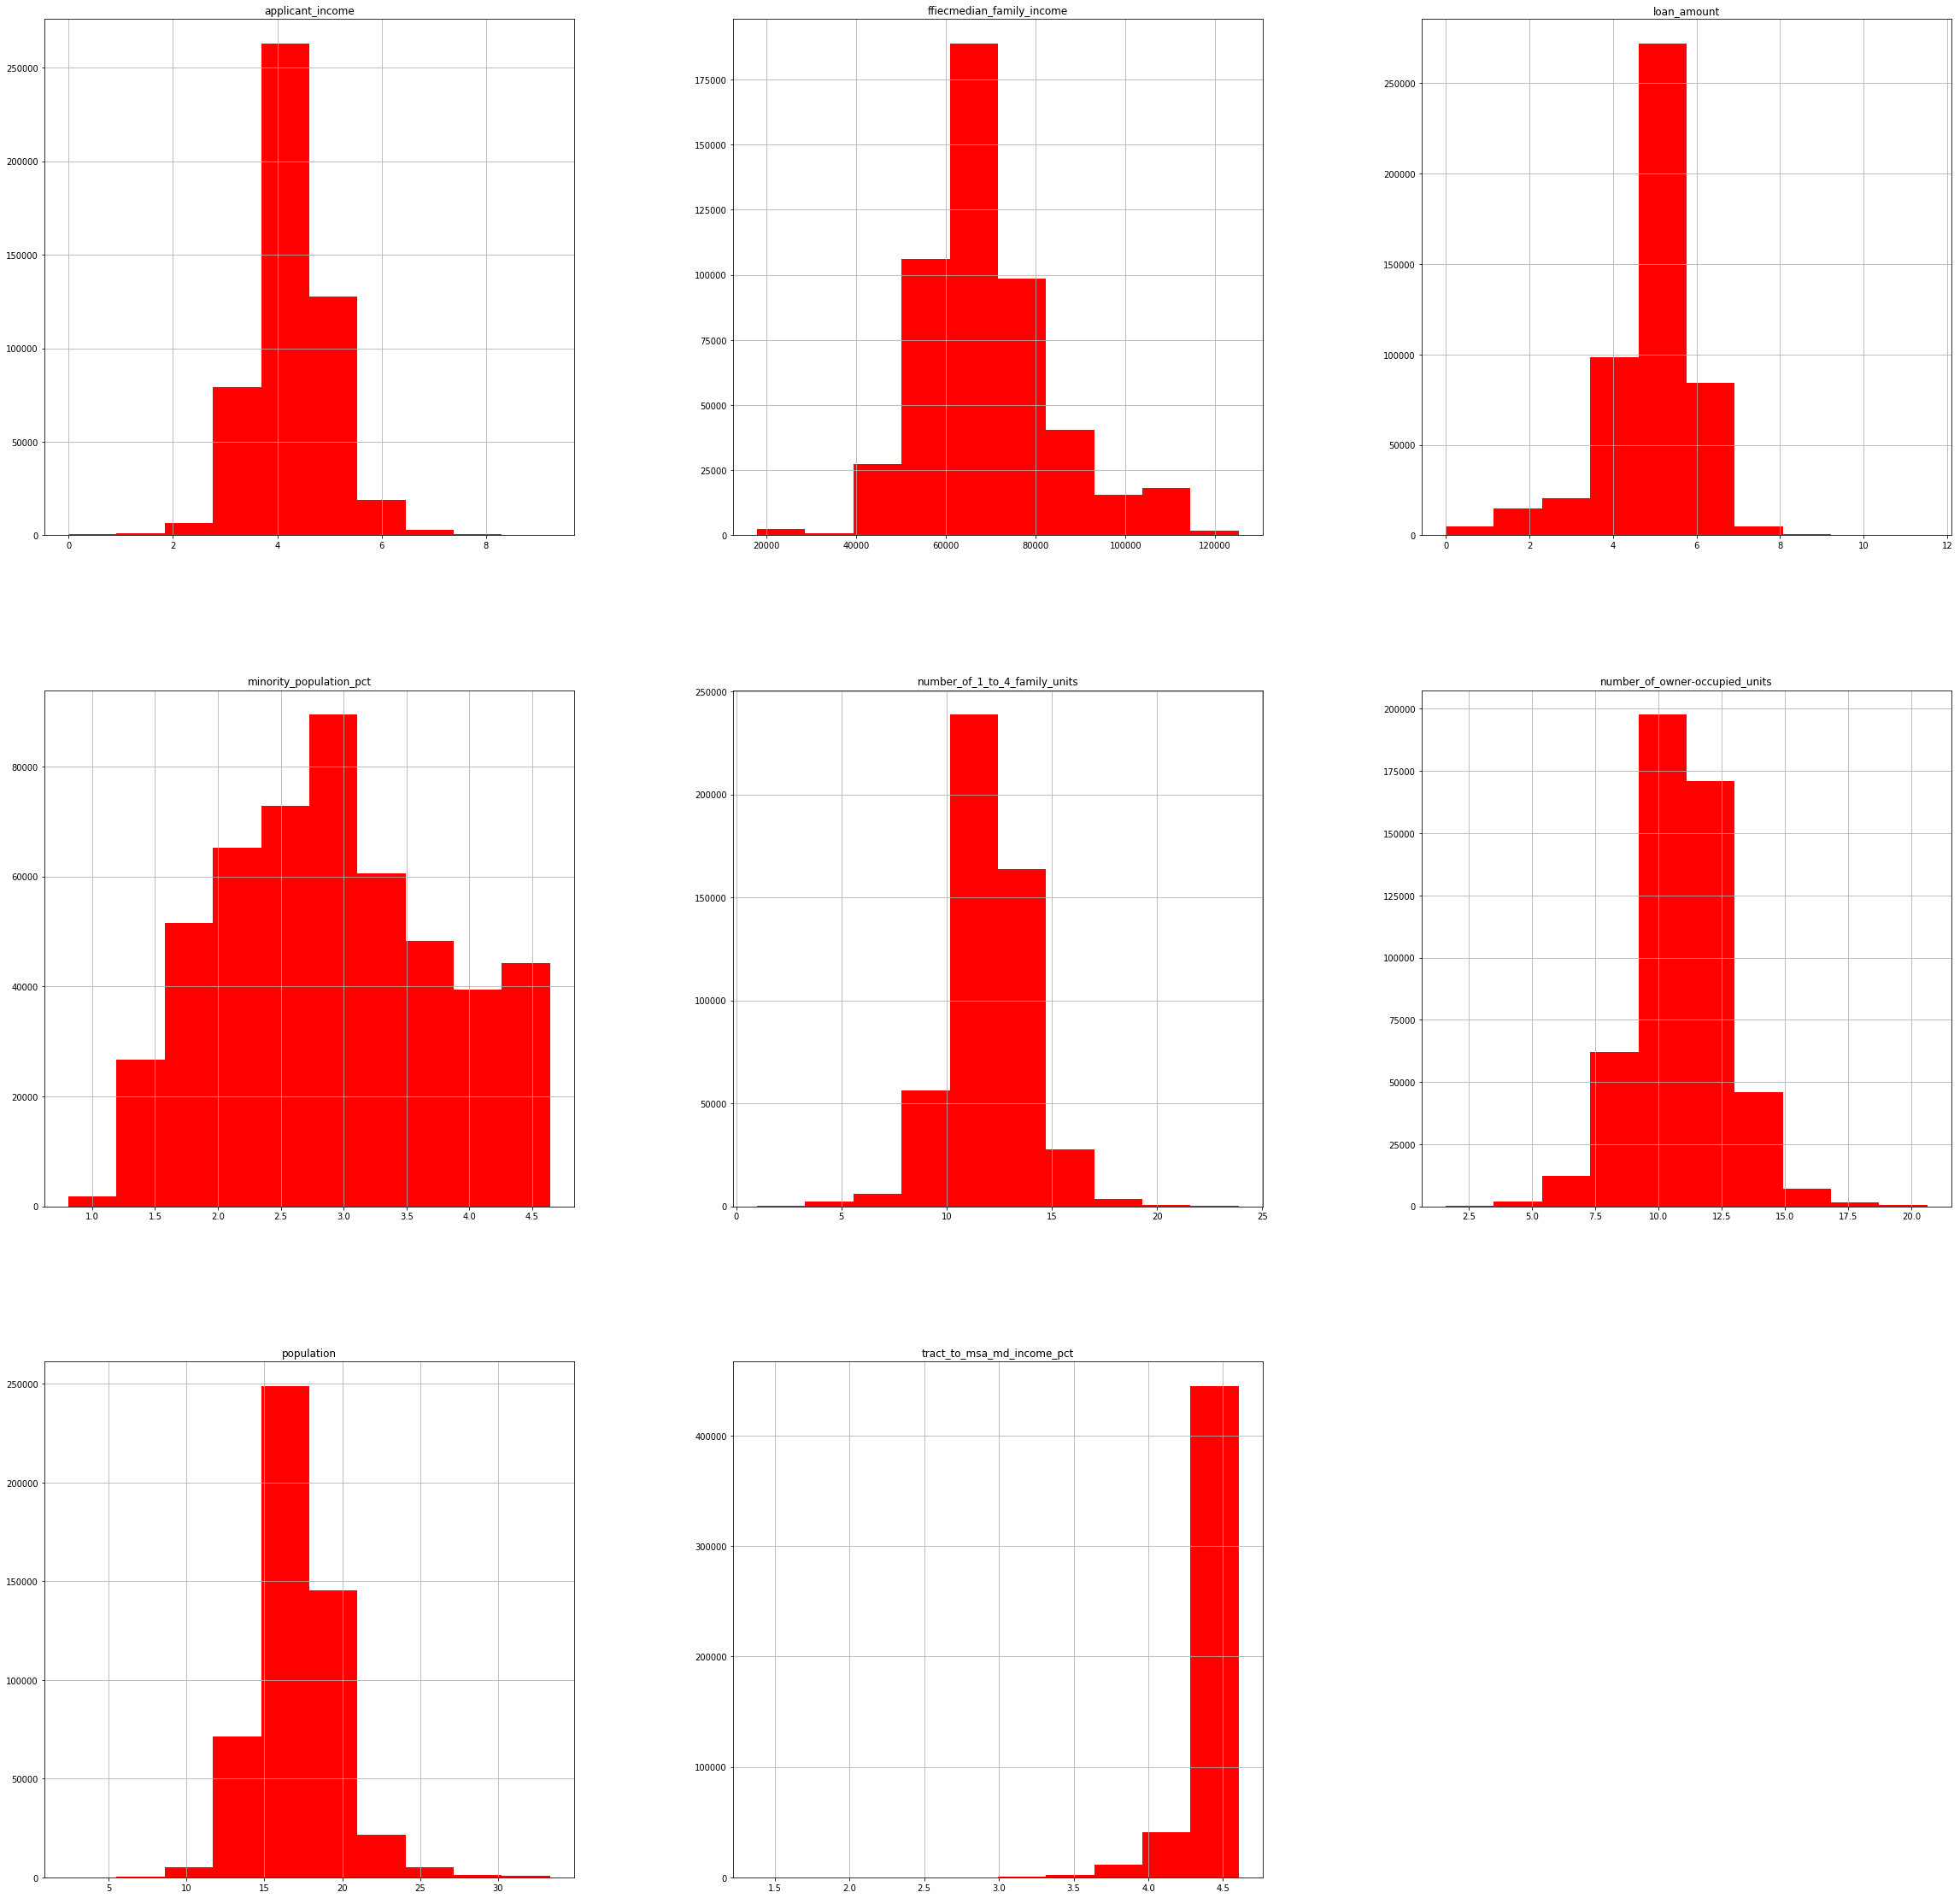

In [51]:
train_final = train_data_median.copy(deep=True)
# train_final = train_data_median_wd.copy(deep=True)
for col in float_log:
    train_final[col] = np.log(train_final[col])
for col in float_cube_root:
    train_final[col] = np.power(train_final[col],1/3)

    
histo=plt.figure()
histo=train_final[float_column].hist(figsize=(40,40), color='r')
plt.show()

In [ ]:
sns.pairplot(train_data_median[float_column])

In [ ]:
sns.pairplot(train_final[float_column])

In [ ]:
cor = train_final[float_column].corr()
heatmap = sns.heatmap(cor,xticklabels=cor.columns.values,yticklabels=cor.columns.values,annot=True,annot_kws={'size':12},cmap='icefire')
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.savefig('correlation_plot.png')
plt.show()

In [ ]:
train_final.head()

In [ ]:
train_scale = train_final[float_column]
# Use RobustScaler
scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(train_scale)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=float_column)

train_final[float_column] = robust_scaled_df

In [ ]:
train_final.head()

In [ ]:
    
histo=plt.figure()
histo=train_final[float_column].hist(figsize=(40,40))
plt.show()

In [ ]:
dropcols = ['accepted''applicant_ethnicity', 'applicant_race', 'applicant_sex']
X = train_final.drop(columns= dropcols,axis=1)
y = train_final['accepted']
print(X.shape)
print(y.shape)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15,random_state=1)
print(X_train.shape)
print(y_train.shape)
print('+-'*7)
print(X_test.shape)
print(y_test.shape)

In [ ]:
columns_to_scale = X.columns.tolist()

In [ ]:
logit = LogisticRegression()
before = time.time()
logitmodel = logit.fit(X_train,y_train)
logpred = logitmodel.predict(X_test)
print("The accuracy score for the logistic regression is %.2f" % (accuracy_score(logpred,y_test)*100))
after = time.time()
print("Time taken to execute algorithm is : {:5.2f} s".format(after - before))
print('+-'*50)

In [ ]:
dtc = DecisionTreeClassifier(max_depth=5) 
before = time.time()
dtcmodel = dtc.fit(X_train,y_train)
dtcpred = dtcmodel.predict(X_test)
print("The accuracy score for the decision tree classifier is %.2f" % (accuracy_score(dtcpred,y_test)*100))
after = time.time()
print("Time taken to execute algorithm is : {:5.2f} s".format(after - before))
# print('The accuracy score for logistic regression is {}'.format(accuracy_score(y_val,ypred)*100))
print('+-'*50)
print('')
# plotting feature importance
fig, ax = plt.subplots()
width=0.35
ax.bar(np.arange(len(columns_to_scale)), dtcmodel.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(dtcmodel.feature_importances_)))
ax.set_xticklabels(X_train.columns.values,rotation=90)
plt.title('Feature Importance from Decision Tree')
ax.set_ylabel('Normalized Gini Importance')

In [ ]:
rand = RandomForestClassifier(bootstrap=True,criterion = "entropy",
                              n_jobs=-1,
                              max_depth=25,
                              n_estimators=700,
                              random_state=0,
                              class_weight="balanced",
                              max_features=0.5,
                              verbose=100)
randmodel = rand.fit(X_train,y_train)
randpred = randmodel.predict(X_test)
# rfPredictproba = randomForest.predict_proba(X_test)[:,1] #for ROC curve
rfAccuracy = accuracy_score(y_test,randpred)
roc_score = roc_auc_score(y_test,randpred)
# print(rfAccuracy)
print("The accuracy score for the random forest classifier is %.2f with an roc_score of %.2f" % (rfAccuracy*100,roc_score))
after = time.time()
print("Time taken to execute algorithm is : {:5.2f} s".format(after - before))
print('+-'*50)
print('')

# plotting feature importance
fig, ax = plt.subplots()
width=0.35
ax.bar(np.arange(len(columns_to_scale)), randmodel.feature_importances_, width, color='b')
ax.set_xticks(np.arange(len(randmodel.feature_importances_)))
ax.set_xticklabels(X_train.columns.values,rotation=90)
plt.title('Feature Importance from Random Forest')
ax.set_ylabel('Normalized Gini Importance')

In [ ]:
# int_columnlumn
cat_int = ['loan_type','property_type','loan_purpose','occupancy','preapproval','msa_md','state_code','county_code','lender','co_applicant']
# cat_int = ['loan_type','property_type','loan_purpose','occupancy','preapproval','lender','co_applicant']
cat_int

In [ ]:
cat = CatBoostClassifier(random_state=0,
                         verbose=100,
                         cat_features=cat_int)
catmodel = cat.fit(X_train,y_train)

In [ ]:
X_train.shape

In [ ]:
cat = CatBoostClassifier(random_state=0,
                         verbose=100,
                         cat_features=cat_int)
catmodel = cat.fit(X_train,y_train)
# catmodel = cat.fit(X_train,y_train,eval_set=(X_test,y_test), plot=True)
catpred = catmodel.predict(X_test)
# rfPredictproba = randomForest.predict_proba(X_test)[:,1] #for ROC curve
rfAccuracy = accuracy_score(y_test,catpred)
roc_score = roc_auc_score(y_test,catpred)
# print(rfAccuracy)
print("The accuracy score for the catboost classifier is %.2f with an roc_score of %.2f" % (rfAccuracy*100,roc_score))
after = time.time()
print("Time taken to execute algorithm is : {:5.2f} s".format(after - before))
print('+-'*50)
print('')

# plotting feature importance
fig, ax = plt.subplots()
width=0.35
ax.bar(np.arange(len(columns_to_scale)), catmodel.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(catmodel.feature_importances_)))
ax.set_xticklabels(X_train.columns.values,rotation=90)
plt.title('Feature Importance')
# ax.set_ylabel('Normalized Gini Importance')

In [ ]:
cat = CatBoostClassifier(
    random_state=0,
    iterations=1000,
    learning_rate=0.4,
    verbose=100,
    boosting_type='Ordered',
    bootstrap_type='Bernoulli',
    subsample=0.8,
    one_hot_max_size=100,
    rsm=0.8,
    eval_metric='Accuracy',
    l2_leaf_reg=8.28,
    leaf_estimation_iterations=8,
    max_ctr_complexity=10,
    border_count=32,
    depth=6,
    use_best_model=True,
    snapshot_file='CATBOOST.bkp',
    early_stopping_rounds=20,
    cat_features=cat_int)
catmodel = cat.fit(X_train,y_train,eval_set=(X_test,y_test), plot=True)
catpred = catmodel.predict(X_test)

# rfPredictproba = randomForest.predict_proba(X_test)[:,1] #for ROC curve
rfAccuracy = accuracy_score(y_test,catpred)
roc_score = roc_auc_score(y_test,catpred)
# print(rfAccuracy)
print("The accuracy score for the catboost classifier is %.2f with an roc_score of %.2f" % (rfAccuracy*100,roc_score))
# after = time.time()
# print("Time taken to execute algorithm is : {:5.2f} s".format(after - before))
# print('+-'*50)
# print('')

# plotting feature importance
fig, ax = plt.subplots()
width=0.35
ax.bar(np.arange(len(columns_to_scale)), catmodel.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(catmodel.feature_importances_)))
ax.set_xticklabels(X_train.columns.values,rotation=90)
plt.title('Feature Importance from Random Forest')
ax.set_ylabel('Normalized Gini Importance')

In [ ]:
prob = catmodel.predict_proba(X_test)

In [ ]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, catpred)   

In [ ]:
catpred = catmodel.predict(X_test)

In [ ]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, prob)    

In [ ]:
catpred.shape

In [ ]:
test_values.head()

In [ ]:
test_values.shape

In [ ]:
test_median = test_values.copy(deep=True)
for col in float_column:
    test_median[col].fillna(test_median[col].median(),inplace=True)

In [ ]:
for col in float_column:
    # get the number of -1 in column
    count = test_median[col].isna().sum()
    if(count>0):
        print('{}: {} missing value'.format(col,count))

In [ ]:
for col in float_log:
    test_median[col] = np.log(test_median[col])
for col in float_cube_root:
    test_median[col] = np.power(test_median[col],1/3)

    
histo=plt.figure()
histo=test_median[float_column].hist(figsize=(40,40))
plt.show()

In [ ]:
dropcols = ['applicant_ethnicity', 'applicant_race', 'applicant_sex']
X = test_median.drop(columns= dropcols,axis=1)
print(X.shape)
print(y.shape)

In [ ]:
test_scale = X[float_column]
# Use RobustScaler
scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(test_scale)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=float_column)

In [ ]:
X[float_column]=robust_scaled_df
X.head()

In [ ]:
catpred = catmodel.predict(X)

In [ ]:
catpred

In [ ]:
submit_format=submit_format.set_index('row_id')

In [ ]:
submit_format.head()

In [ ]:
submit_format.shape

In [ ]:
submit_format['accepted']=catpred
submit_format['accepted']=submit_format['accepted'].astype(int)

In [ ]:
submit_format.head()

In [ ]:
submit_format.to_csv(
    'result.csv',
    header=True)

### scale both train and test numerical data

In [ ]:
dropcols = ['accepted', 'applicant_ethnicity', 'applicant_race', 'applicant_sex']
X = train_final.drop(columns= dropcols,axis=1)
y = train_final['accepted']
print(X.shape)
print(y.shape)

In [ ]:
train_scale = X[float_column]

In [ ]:
# Use RobustScaler
scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(train_scale)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=float_column)

# Use MinMaxScaler
scaler = preprocessing.MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(train_scale)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=float_column)

In [ ]:
X[float_column]=robust_scaled_df
X.head()

In [ ]:
histo=plt.figure()
histo=X[float_column].hist(figsize=(40,40))
plt.show()

In [ ]:
test_scale = X[float_column]

# Use RobustScaler
scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(test_scale)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=float_column)


In [ ]:
test_scale[float_column]=robust_scaled_df
test_scale.head()

In [ ]:
train_values.shape

In [ ]:
train_values[train_values['number_of_1_to_4_family_units']<5000].shape